In [2]:
import argparse
import numpy as np
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
grasp_easy_trajs_dir = '/media/3tb/chet/robo_exp/grasp_easy_trajs/'

In [4]:
def merge_trajectory_datasets(file_pattern, dest_path):
    dataset_files = [f for f in glob.glob(file_pattern) if f.endswith('.npy')]
    num_datasets = len(dataset_files)
    merged_dataset = np.load(dataset_files[0], allow_pickle='True')
    for i, ds_file in enumerate(dataset_files):
        merged_dataset[i::num_datasets] = np.load(ds_file, allow_pickle='True')[i::num_datasets]
    np.save(dest_path, merged_dataset)

In [9]:
merged_dataset_path = f'{grasp_easy_trajs_dir}Widow250GraspEasyRandomTrain-v0_5K_noise_0.1_5000.npy'
merge_trajectory_datasets(f'{grasp_easy_trajs_dir}*.npy', merged_dataset_path)

In [15]:
merged_dataset = np.load(merged_dataset_path ,allow_pickle=True)

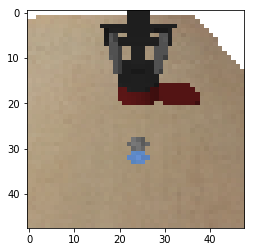

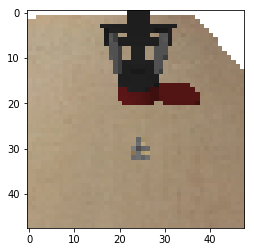

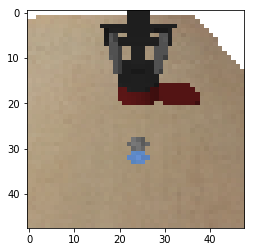

In [16]:
plt.imshow(merged_dataset[0]['observations'][0]['image'])
plt.show()
plt.imshow(merged_dataset[1]['observations'][0]['image'])
plt.show()
plt.imshow(merged_dataset[6]['observations'][0]['image'])
plt.show()

In [5]:
def convert_dataset_d4rl(src_path, dest_path):
    trajs = np.load(src_path, allow_pickle=True)
    traj_keys = trajs[0].keys()
    dataset_dict = defaultdict(list)
    for k in traj_keys:
        val_is_dict = isinstance(trajs[0][k][0], dict)
        if val_is_dict:
            dataset_dict[k] = defaultdict(list)
        for traj in trajs:
            for val in traj[k]:
                if val_is_dict:
                    for sub_key, sub_val in val.items():
                        dataset_dict[k][sub_key].append(sub_val)
                else:
                    dataset_dict[k].append(val)
        if val_is_dict:
            for sub_key, val_list in dataset_dict[k].items():
                dataset_dict[k][sub_key] = np.array(val_list)
        else:
            dataset_dict[k] = np.array(dataset_dict[k])
    np.save(dest_path, dataset_dict)

def convert_d4rl(file_pattern, dest_dir_path):
    dest_dir = Path(dest_dir_path)
    if not dest_dir.exists():
        dest_dir.mkdir()

    for f in glob.glob(file_pattern):
        if f.endswith('npy'):
            src_path = Path(f)
            dest_path = Path(f'{dest_dir_path}/{src_path.stem}_d4rl{src_path.suffix}')
            convert_dataset_d4rl(src_path, dest_path)

In [6]:
d4rl_dir = '/media/3tb/chet/robo_exp/grasp_easy_d4rl/'
convert_d4rl(f'{grasp_easy_trajs_dir}*.npy', '/media/3tb/chet/robo_exp/grasp_easy_d4rl')

In [13]:
circular_table_d4rl_path = f'{d4rl_dir}circular_table_Widow250GraspEasyTrain-circular_table-v0_5K_noise_0.1_2022-04-18T12-58-26_5000_d4rl.npy'
table_d4rl_dataset = np.load(circular_table_d4rl_path, allow_pickle=True).item()
table_d4rl_dataset.keys()

dict_keys(['observations', 'actions', 'rewards', 'next_observations', 'terminals', 'agent_infos', 'env_infos'])

In [14]:
table_d4rl_dataset['observations'].keys()

dict_keys(['object_position', 'object_orientation', 'state', 'image'])

In [16]:
table_d4rl_dataset['observations']['image'].shape

(75000, 48, 48, 3)